In [61]:
# Метод наименьших квадратов

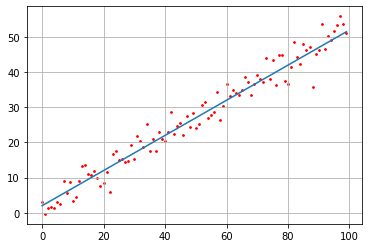

In [88]:
from IPython.display import display, Math, Latex
import time
import scipy as sc
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

N = 100
sigma = 3
k = 0.5
b = 2

f = np.array([k*z + b for z in range(N)])
y = f + np.random.normal(0, sigma, N)

x = np.array(range(N))

plt.plot(f)
plt.scatter(x, y, s=3, c='red')
plt.grid(True)
plt.show()

In [63]:
# Матричная сумма считается быстрее, чем при помощи цикла for
display(Math(r'a^*_{1,1} = \frac{1}{N}*\sum_{i=1}^{N}x_iy_i'))
display(Math(r'a^*_2 = \frac{1}{N}*\sum_{i=1}^{N}x_i^2'))
display(Math(r'm^*_x = \frac{1}{N}*\sum_{i=1}^{N}x_i'))
display(Math(r'm^*_y = \frac{1}{N}*\sum_{i=1}^{N}y_i'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [64]:
display(Math(r'k = \frac{a^*_{1,1} - m^*_xm^*_y}{a^*_2 - (m^*_x)^2}'))
display(Math(r'b = m^*_y - k * m^*_x'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [65]:
display(Math(r'a^*_2 = \frac{np.dot(x.T, x)}{N} \rightarrow \vec x^T * \vec x = [0,1,2, ..., N - 1]^T * \begin{vmatrix} 0\\1\\...\\N-1\end{vmatrix} = \sum_{i=0}^{N-1}x_i^2'))

<IPython.core.display.Math object>

In [66]:
mx = x.sum()/N
my = y.sum()/N
a2 = np.dot(x.T, x) / N
a11 = np.dot(x.T, y) / N

In [67]:
kk = (a11 - mx * my) / (a2 - mx**2)
bb = my - kk * mx

In [68]:
ff = np.array([kk * z + bb for z in range(N)])

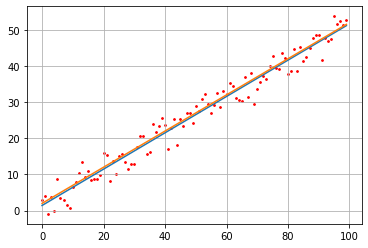

In [69]:
plt.plot(ff)
plt.plot(f)
plt.scatter(x, y, s=3, c='red')
plt.grid(True)
plt.show()

In [70]:
# Метод градиентного спуска

In [71]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [72]:
def f(x):
    return x * x - 5 * x + 5

def df(x):
    return 2 * x - 5

x_plt = np.arange(1, 5, 0.1) # диапазон изменения аргумента (от 0 до 5, с шагом 0.1)
f_plt = [f(x) for x in  x_plt] # для визуализации

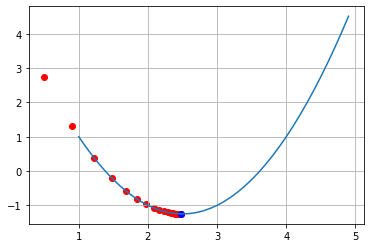

2.471176962384829


In [73]:
lmd = 0.1 # Шаг сходимости
N = 20 # число итераций
xx = 0 # стартовое значение

fig, ax = plt.subplots() # Создания окна и осей для графика
ax.grid(True) # отображение сетки на графике

ax.plot(x_plt, f_plt) # Отображение параболы
    
for i in range(N):
    xx = xx - lmd * df(xx) # Изменение аргумента на текущей итерации
    point = ax.scatter(xx, f(xx), c='red') # отображение точки красным цветом

ax.scatter(xx, f(xx), c='blue')
plt.show()
print(xx)

In [74]:
# Затухающий шаг сходимости

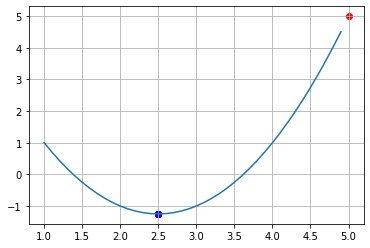

2.5


In [75]:
lmd = 0.3 # Шаг сходимости
N = 20 # число итераций
xx = 0 # стартовое значение

fig, ax = plt.subplots() # Создания окна и осей для графика
ax.grid(True) # отображение сетки на графике

ax.plot(x_plt, f_plt) # Отображение параболы

mn = 100
for i in range(N):
    lmd = 1 / min(i + 1, mn) 
    xx = xx - lmd * df(xx) # Изменение аргумента на текущей итерации
    ax.scatter(xx, f(xx), c='red') # отображение точки красным цветом

ax.scatter(xx, f(xx), c='blue')
plt.show()
print(xx)

In [76]:
def f(x):
    return np.sin(x) + 0.5 * x

def df(x):
    return np.cos(x) + 0.5

In [77]:
x_plt = np.arange(-5, 5, 0.1) # диапазон изменения аргумента (от 0 до 5, с шагом 0.1)
f_plt = [f(x) for x in  x_plt] # для визуализации

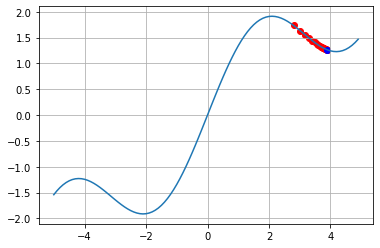

3.884591554825001


In [78]:
lmd = 0.3 # Шаг сходимости
N = 20 # число итераций
xx = 2.5 # стартовое значение

fig, ax = plt.subplots() # Создания окна и осей для графика
ax.grid(True) # отображение сетки на графике

ax.plot(x_plt, f_plt) # Отображение параболы

mn = 100
for i in range(N):
    lmd = 1 / min(i + 1, mn) 
    xx = xx - lmd * df(xx) # Изменение аргумента на текущей итерации
    ax.scatter(xx, f(xx), c='red') # отображение точки красным цветом

ax.scatter(xx, f(xx), c='blue')
plt.show()
print(xx)

In [79]:
# Метод градиентного спуска для поиска двух параметров

In [80]:
display(Math(r'E = \sum_{i=1}^N(y_i - f(x_i))^2 = \sum_{i=1}^N(y_i-ax_i-b)^2'))

<IPython.core.display.Math object>

In [81]:
display(Math(r'\frac{\vartheta E(a,b)}{\vartheta a} = -2 \sum_{i=1}^N (y_i - ax_i -b) * x_i'))
display(Math(r'\frac{\vartheta E(a,b)}{\vartheta b} = -2 \sum_{i=1}^N (y_i - ax_i -b) * 1'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [82]:
display(Math(r'a_{n+1} = a_n - \lambda^1_n * \frac{\vartheta E(a,b)}{\vartheta a}'))
display(Math(r'b_{n+1} = b_n - \lambda^2_n * \frac{\vartheta E(a,b)}{\vartheta b}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [84]:
N = 100 # Кол-во экспериментов
Niter = 50 # Кол-во итераций
sigma = 3 # Стандартное отклонение наблюдаемых значений
at = 0.5
bt = 2

def E(y,a,b):
    ff = np.array([a * z + b for z in range(N)])
    return np.dot((y - ff).T, (y - ff))

def dEda(y,a,b):
    ff = np.array([a * z + b for z in range(N)])
    return -2 * np.dot((y - ff).T, range(N))

def dEdb(y, a, b):
    ff = np.array([a * z + b for z in range(N)])
    return -2 * (y - ff).sum()

aa = 0
bb = 0
lmd1 = 0.000001
lmd2 = 0.0005

f = np.array([at * z + bt for z in range(N)]) # теоретическая прямая
y = np.array(f + np.random.normal(0, sigma, N)) # экспериментальные значения Y

a_plt = np.arange(-1, 2, 0.1) 
b_plt = np.arange(0, 3, 0.1)
E_plt = np.array([[E(y, a, b) for a in a_plt] for b in b_plt])

<ipython-input-94-0f62ab517a52>:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


0.3537809071454616 0.9574023339645469
0.4657556094622496 1.2647896580645388
0.501153390259013 1.3662192348105529
0.5123012955967563 1.402323722460136
0.5157709370714727 1.4176430360449144
0.5168104037852536 1.4262850580379998
0.517081696690363 1.432719977951485
0.5171111258375435 1.4383657315950782
0.517065335902699 1.4436735700517924
0.5169970686173454 1.4487885477253353
0.5169229941793154 1.4537586960997724
0.5168483599558328 1.4586012690430046
0.5167747965547733 1.4633237235271581
0.5167027899397965 1.4679303653070317
0.5166324643152541 1.4724244547504026
0.5165638300428593 1.4768088748977906
0.5164968621376871 1.4810863441610422
0.5164315251101352 1.4852594847843505
0.516367780816406 1.4893308455992877
0.5163055909283009 1.4933029102788515
0.5162449176993866 1.4971781009735845
0.5161857241920226 1.5009587804602962
0.516127974334026 1.5046472537954199
0.5160716329217581 1.5082457697877574
0.5160166656066024 1.5117565223908818
0.5159630388765385 1.5151816520475099
0.515910720036507 1

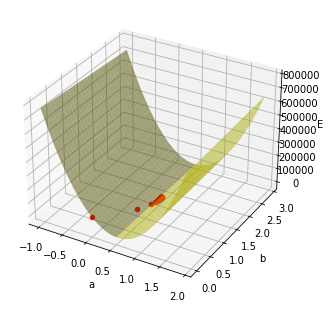

In [94]:
plt.ion()
fig = plt.figure()
ax = Axes3D(fig)

a, b = np.meshgrid(a_plt, b_plt)
ax.plot_surface(a, b, E_plt, color='y', alpha=0.5)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('E')

point = ax.scatter(aa, bb, E(y, aa, bb), c='red')

for n in range(Niter):
    aa = aa - lmd1 * dEda(y, aa, bb)
    bb = bb - lmd2 * dEdb(y, aa, bb)
    
    ax.scatter(aa, bb, E(y, aa, bb), c='red')
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.01)
    
    print(aa, bb)

plt.ioff()